# DATA VISUALIZATION

In this section we will cover basic **data visualization** in Pandas, and use the plot method to create & customize line charts, bar charts, pie charts, scatterplots, and histograms.

## GOALS FOR THIS SECTION:
- Use the Matplotlib API and the `.plot()` method to create visualizations from Pandas DataFrames
- Create different chart types for individual and multiple series of data
- Modify the chart elements and formatting to tell a clear story with data

In [1]:
import pandas as pd

In [2]:
oil_data = "https://media.githubusercontent.com/media/apoorvpd/data_practice/master/oil.csv"
league_data = "https://raw.githubusercontent.com/apoorvpd/data_practice/master/premier_league_games_full.xlsx"
retail_data = "https://media.githubusercontent.com/media/apoorvpd/data_practice/master/retail_2016_2017.csv"
stores_data = "https://media.githubusercontent.com/media/apoorvpd/data_practice/master/stores.csv"
transactions_data = "https://media.githubusercontent.com/media/apoorvpd/data_practice/master/transactions.csv"

# THE PLOT METHOD

- You can visualize a DataFrame by using the **`.plot()`** method
- This creates a **line chart** by default, using the row index as the x-axis and plotting each numerical column as a separate series on the y-axis

In [3]:
transactions = pd.read_csv(transactions_data, parse_dates=["date"])
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


<Axes: >

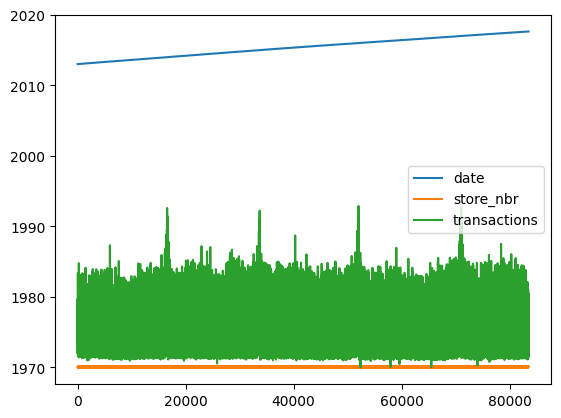

In [4]:
transactions.plot()

> - Note that `date` was plotted as a numeric series
> - The index is used as the x-axis by default

You can **change the x-axis** by setting a different index 

<Axes: xlabel='date'>

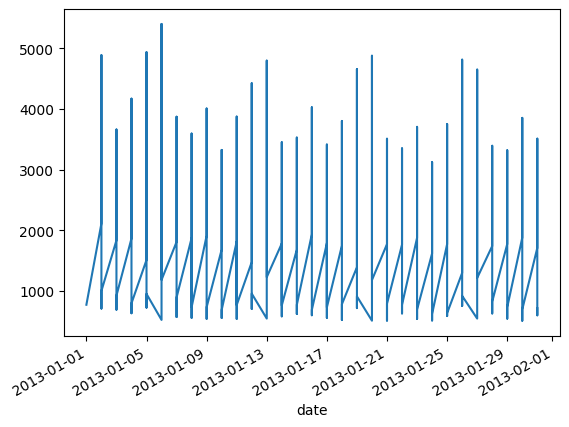

In [5]:
transactions.set_index("date").loc["2013-01", "transactions"].plot()

> - This is going to lead to some very, very confusing types of graphs
> - Our chart doesn't know how to connect the dots because we have around 50 rows for each of these dots to connect

<Axes: xlabel='date'>

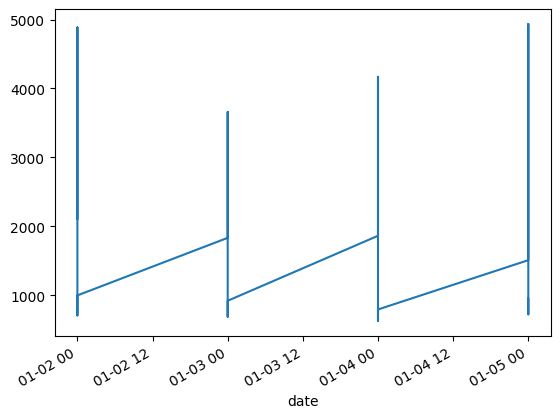

In [6]:
transactions.set_index("date").loc["2013-01-02":"2013-01-05", "transactions"].plot()

> We can fix this by filtering down to just store number 44 and the rest of the code is going to be the same

<Axes: xlabel='date'>

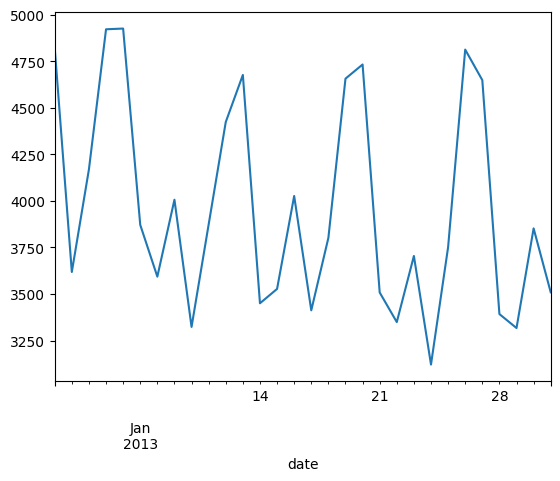

In [7]:
transactions.query("store_nbr == 44").set_index("date").loc["2013-01", "transactions"].plot()

> We can see that we have one date per row and this is what we need if we want to have a time series line plot that makes sense.

In [8]:
transactions.query("store_nbr == 44").set_index("date").loc["2013-01", "transactions"]

date
2013-01-02    4821
2013-01-03    3618
2013-01-04    4169
2013-01-05    4921
2013-01-06    4925
2013-01-07    3871
2013-01-08    3593
2013-01-09    4006
2013-01-10    3323
2013-01-11    3873
2013-01-12    4423
2013-01-13    4676
2013-01-14    3450
2013-01-15    3527
2013-01-16    4026
2013-01-17    3412
2013-01-18    3801
2013-01-19    4656
2013-01-20    4732
2013-01-21    3508
2013-01-22    3349
2013-01-23    3704
2013-01-24    3121
2013-01-25    3751
2013-01-26    4812
2013-01-27    4648
2013-01-28    3392
2013-01-29    3317
2013-01-30    3852
2013-01-31    3509
Name: transactions, dtype: int64

>- Another thing you might do is set up your data frame ahead of time

In [9]:
transactions_44 = transactions.loc[transactions["store_nbr"] == 44, ["date", "transactions"]]
transactions_44.head()

,date,transactions
38,2013-01-02,4821
84,2013-01-03,3618
130,2013-01-04,4169
176,2013-01-05,4921
222,2013-01-06,4925


<Axes: xlabel='date'>

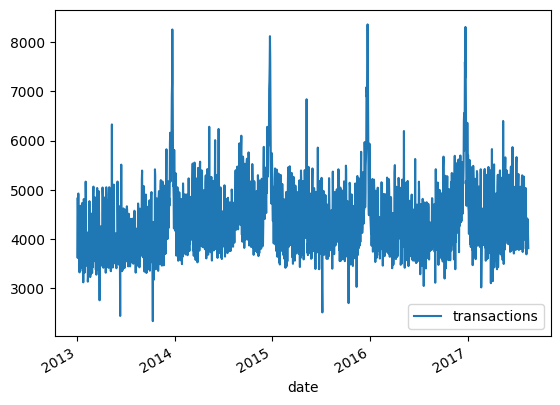

In [10]:
transactions_44.set_index("date").plot()

> As opposed to using the `set_index()` method, you could also specify `x="date"` and `y="transactions"` in `.plot()` method 

<Axes: xlabel='date'>

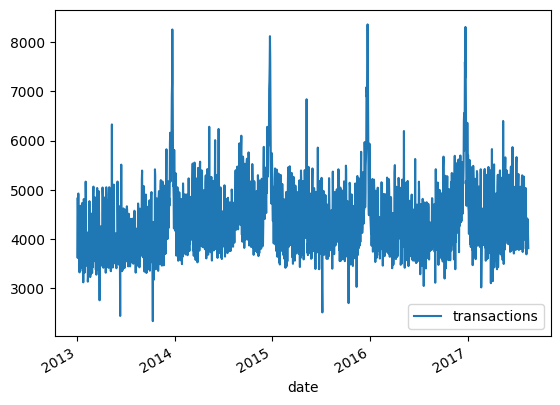

In [11]:
transactions_44.plot(x="date", y="transactions")

Pivot table method is a great way to get our data in a shape for plotting.

<Axes: xlabel='date'>

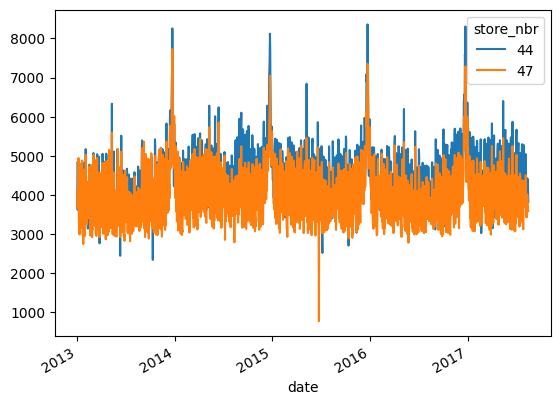

In [12]:
(
    transactions
        .query("store_nbr in [44, 47]")
        .pivot_table(index="date", columns="store_nbr")
        .droplevel(0, axis=1)
        .plot()
)

# EXERCISE: THE PLOT METHOD

#### NEW MESSAGE: 
- From: Rachel Revenue (Sr. Financial Analyst)
- Subject: Oil Price Trends

`Hi there,`

`I don’t have a great grasp on the trends in oil prices, there are
way too many values to understand from table data.`

`Can you plot the oil prices with a simple line chart?`

`Can you Google ‘oil price decline 2014’ to help understand
the big drop in prices?`

`Thanks!`

In [13]:
oil = pd.read_csv(oil_data).dropna()

In [14]:
oil.head()

,date,dcoilwtico
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21


<Axes: xlabel='date'>

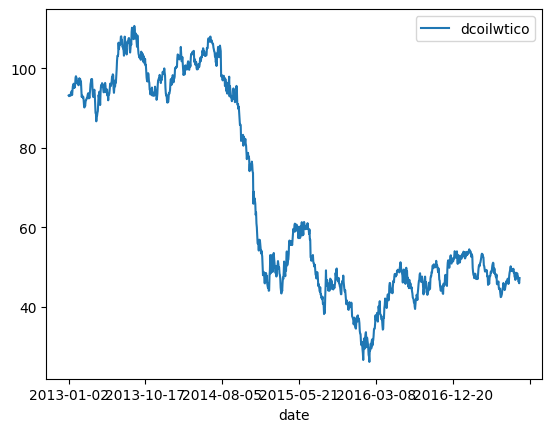

In [15]:
oil.set_axis(oil['date']).plot()

<Axes: xlabel='date'>

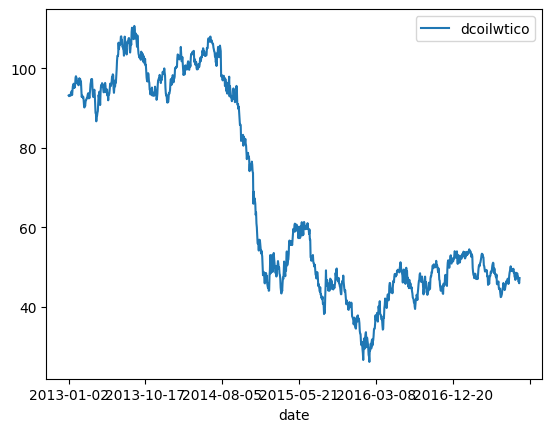

In [16]:
oil.plot(x="date")

<Axes: xlabel='date'>

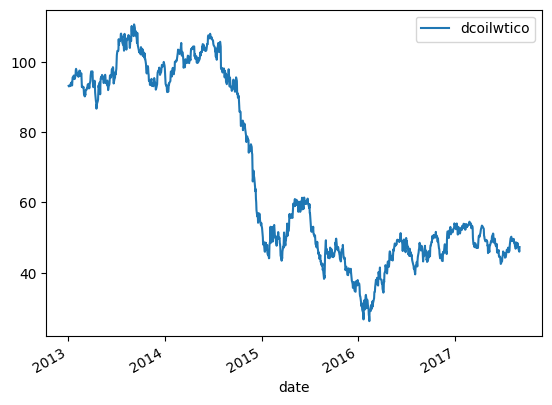

In [17]:
oil.astype({"date": "datetime64[ns]"}).plot(x="date")

<Axes: xlabel='date'>

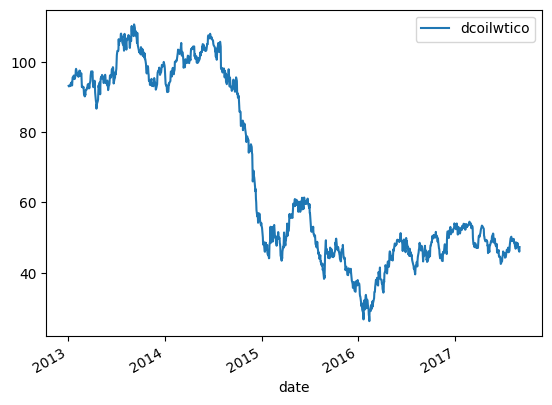

In [18]:
oil.astype({"date": "datetime64[ns]"}).set_index("date").plot()

> We can combine `loc` with `set_index` in case we want to narrow down

<Axes: xlabel='date'>

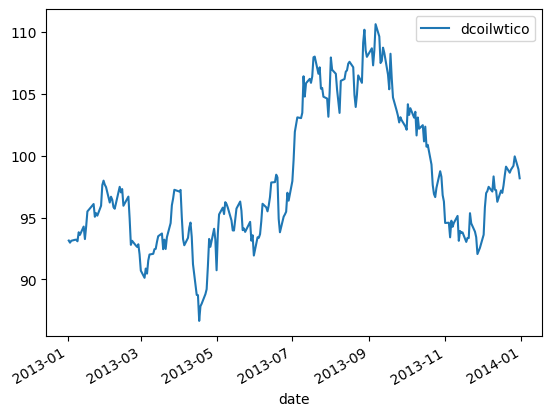

In [19]:
oil.astype({"date": "datetime64[ns]"}).set_index("date").loc["2013"].plot() 

# CHART TITLES

You can modify the **chart formatting** by using `.plot()` method arguments

> - You can add a custom **chart title** and **axis labels** to increase understanding
> - Break each `.plot()` argument into separate rows to make the code easier to read

<Axes: title={'center': 'Store 44 Transactions 2013-2017'}, xlabel='Year', ylabel='Daily Transactions'>

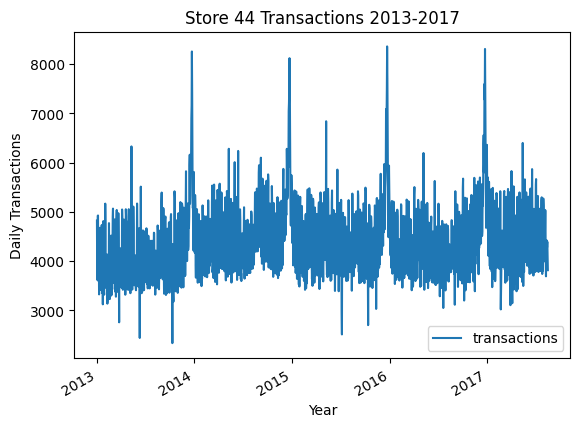

In [20]:
transactions_44.set_index('date').plot(
 title="Store 44 Transactions 2013-2017",
 xlabel='Year',
 ylabel='Daily Transactions'
)

# SERIES COLORS

- You can modify the **series colors** by using common color names or hex codes.
- Note that Python understands basic colors like "Black", "Red", "Green" etc.

<Axes: title={'center': 'Store 44 Transactions 2013-2017'}, xlabel='Year', ylabel='Daily Transactions'>

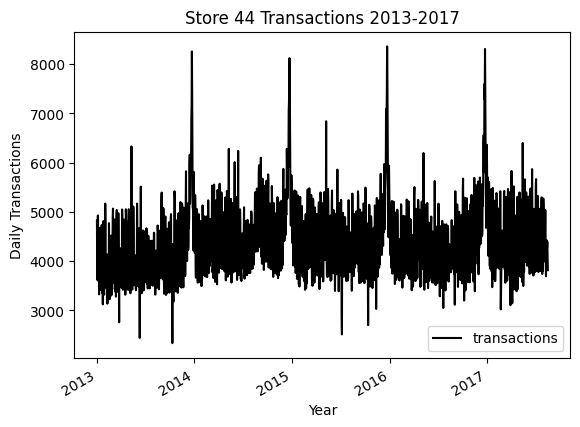

In [21]:
transactions_44.set_index('date').plot(
 title="Store 44 Transactions 2013-2017",
 xlabel='Year',
 ylabel='Daily Transactions',
 color="Black"
)

<Axes: title={'center': 'Store 44 Transactions 2013-2017'}, xlabel='Year', ylabel='Daily Transactions'>

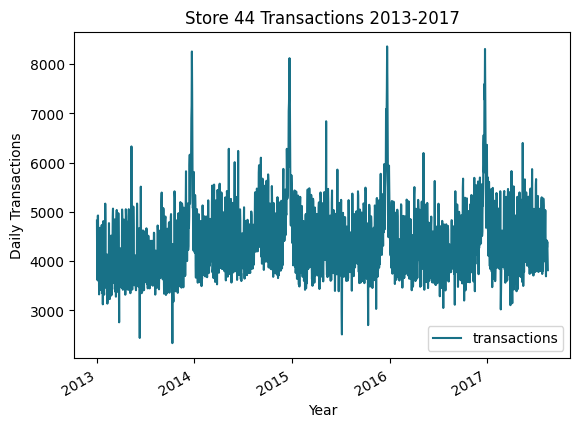

In [22]:
transactions_44.set_index('date').plot(
 title="Store 44 Transactions 2013-2017",
 xlabel='Year',
 ylabel='Daily Transactions',
 color="#187187"
)

> If you have more than one series, you can pass the colors in a list

<Axes: xlabel='date'>

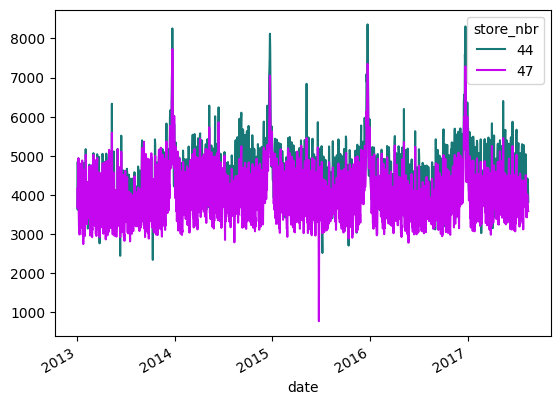

In [23]:
(transactions
 .query("store_nbr in [44, 47]")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(color=["#187878", "#c507f0"])
 )

# LINE STYLE

Line charts are solid by default, but you can change the **line style** if needed

## SYMBOL:
- `-`:  Solid (default)
- `--`: Dashed
- `-.`: Dash-dot
- `..`: Dotted

<Axes: title={'center': 'Store 44 Transactions 2013-2017'}, xlabel='Date', ylabel='Daily Transactions'>

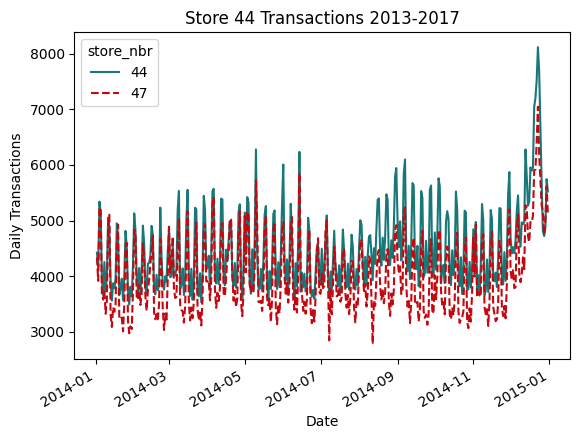

In [24]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2013-2017",
     xlabel="Date",
     ylabel="Daily Transactions",
     color=["#187878", "#c5070f"],
     style=["-","--"]
))

# CHART LEGENDS & GRIDLINES

- The `legend` `.plot()` argument lets you **add or remove the legend**
- You can add **gridlines** to charts for visual reference

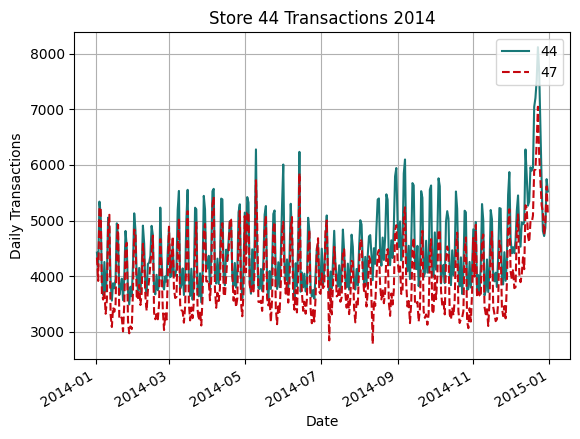

In [25]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2014",
     xlabel="Date",
     ylabel="Daily Transactions",
     color=["#187878", "#c5070f"],
     style=["-","--"],
     grid=True
)).legend(loc="upper right")

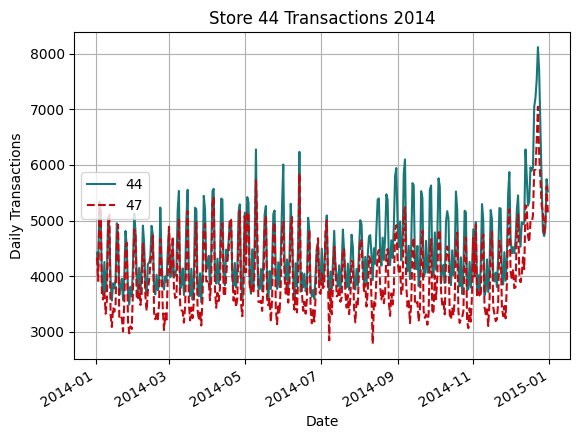

In [26]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2014",
     xlabel="Date",
     ylabel="Daily Transactions",
     color=["#187878", "#c5070f"],
     style=["-","--"],
     grid=True
)).legend(loc="center left")

> supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

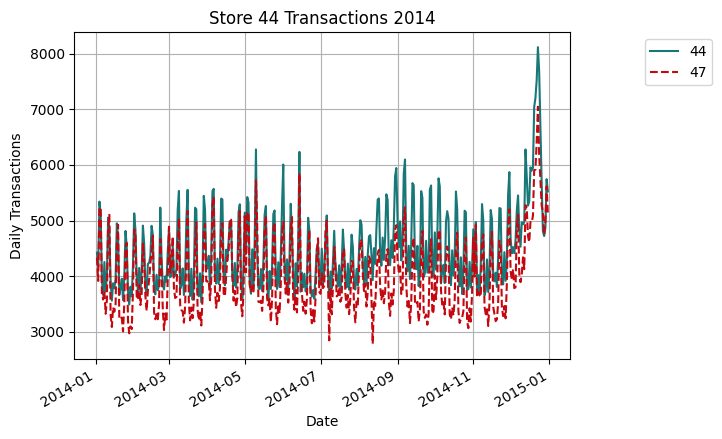

In [27]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2014",
     xlabel="Date",
     ylabel="Daily Transactions",
     color=["#187878", "#c5070f"],
     style=["-","--"],
     grid=True
)).legend(bbox_to_anchor=(1.3, 1))

> "`bbox_to_anchor`" lets you specify the coordinates for the legend (*it takes some trial and error!*)

# PRO TIP: CHART STYLES

- Matplotlib & Seaborn have premade **style templates** that can be applied to charts
- Once a style is set, it will automatically be applied to all charts

In [28]:
import seaborn as sns

sns.set_style("darkgrid")

<Axes: title={'center': 'Store 44 Transactions 2014'}, xlabel='Date', ylabel='Daily Transactions'>

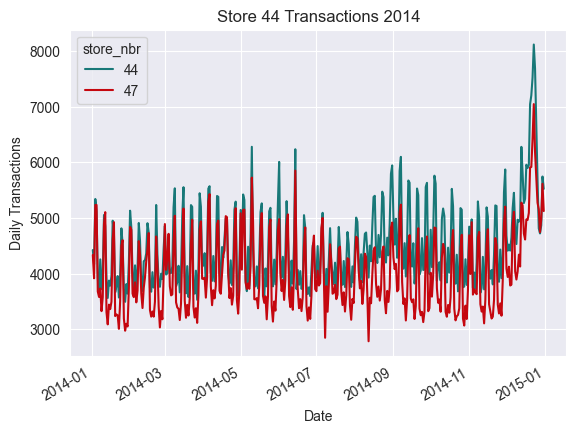

In [29]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2014",
     xlabel="Date",
     ylabel="Daily Transactions",
     color=["#187878", "#c5070f"],
))

In [30]:
import matplotlib
matplotlib.style.use("fivethirtyeight")

<Axes: title={'center': 'Store 44 Transactions 2014'}, xlabel='Date', ylabel='Daily Transactions'>

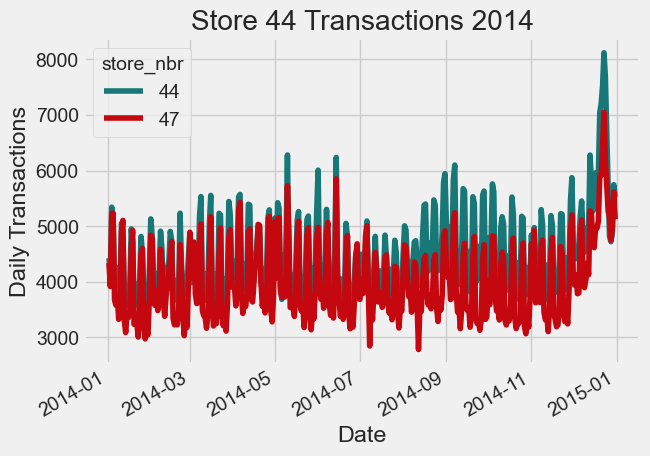

In [31]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2014",
     xlabel="Date",
     ylabel="Daily Transactions",
     color=["#187878", "#c5070f"],
))

# EXERCISE: FORMATTED CHART

#### NEW MESSAGE: 
- From: Rachel Revenue (Sr. Financial Analyst)
- Subject: Oil Price Presentation

`Hi there, thanks for helping me visualize the price trends.`

`Can you format it so it’s more suitable for management?`

`Our company tends to use “darkgrid” for the style, but I’d also
like a chart title, axis labels, the line to be in black, and to
rename the price column to a more intuitive name.`

`Finally, consider converting the ‘date’ column to datetime64 –
I’ve heard this will create better labels on the x-axis.`

`Thanks!`

<Axes: title={'center': 'Oil Price 2013-2017'}, xlabel='Date', ylabel='USD Price'>

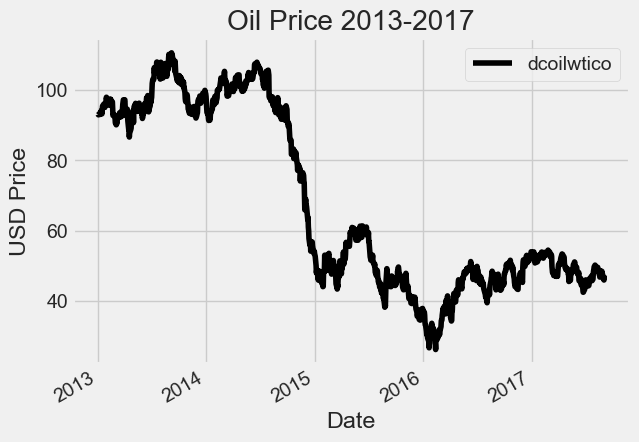

In [32]:
oil.set_index(oil["date"].astype("datetime64[ns]")).plot(
    title="Oil Price 2013-2017",
    xlabel="Date",
    ylabel="USD Price",
    c="Black"
)

# SUBPLOTS

You can leverage **subplots** to create a separate chart for each series

array([<Axes: xlabel='Date', ylabel='Daily Transactions'>,
       <Axes: xlabel='Date', ylabel='Daily Transactions'>], dtype=object)

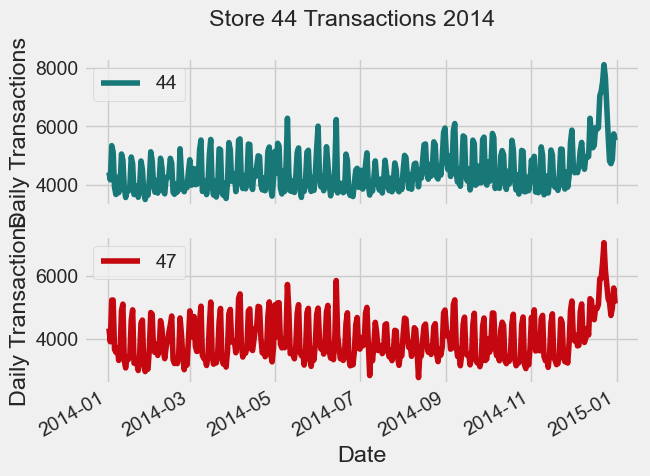

In [33]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2014",
     xlabel="Date",
     ylabel="Daily Transactions",
     color=["#187878", "#c5070f"],
     subplots=True,
))

There are several subplot options you can use:
- **layout** lets you specify the rows and columns for the subplots
- **sharey & sharex** let you set consistent axes across the subplots
- **title** can map a list of specified titles to each subplot

array([[<Axes: xlabel='Date', ylabel='Daily Transactions'>,
        <Axes: xlabel='Date', ylabel='Daily Transactions'>]], dtype=object)

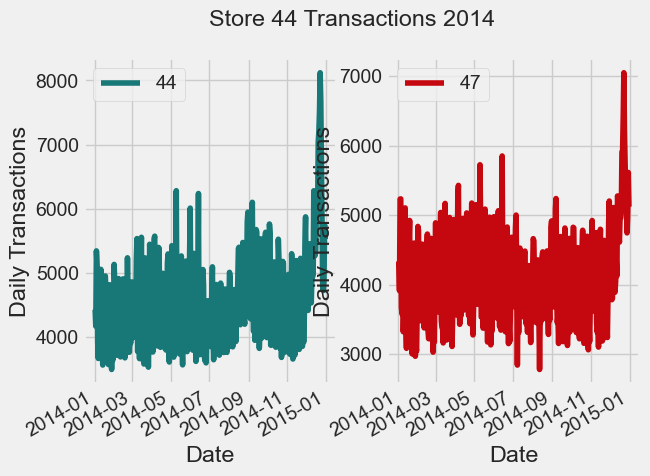

In [34]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2014",
     xlabel="Date",
     ylabel="Daily Transactions",
     color=["#187878", "#c5070f"],
     subplots=True,
     layout=(1, 2),
))

array([[<Axes: xlabel='Date', ylabel='Daily Transactions'>,
        <Axes: xlabel='Date', ylabel='Daily Transactions'>]], dtype=object)

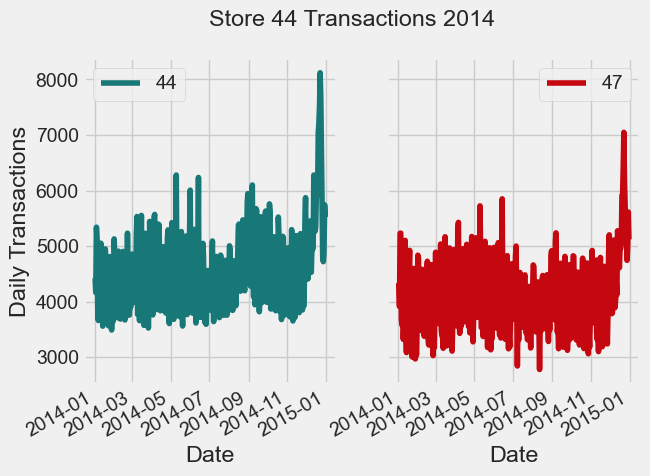

In [35]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2014",
     xlabel="Date",
     ylabel="Daily Transactions",
     color=["#187878", "#c5070f"],
     subplots=True,
     layout=(1, 2),
    sharey=True,
))

array([[<Axes: xlabel='Date', ylabel='Daily Transactions'>],
       [<Axes: xlabel='Date', ylabel='Daily Transactions'>]], dtype=object)

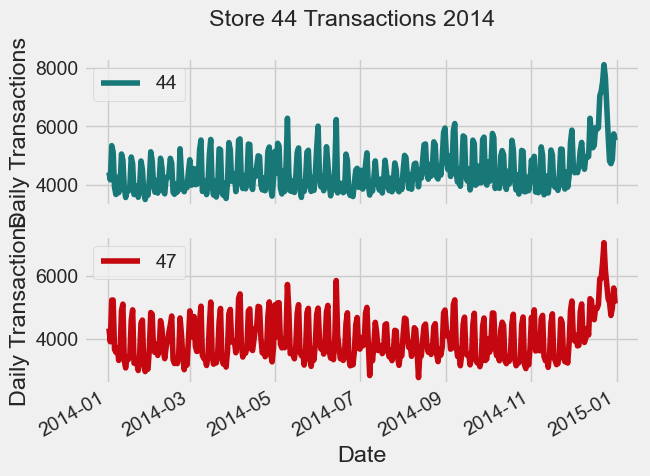

In [36]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014")
 .pivot_table(index="date", columns="store_nbr")
 .droplevel(0, axis=1)
 .plot(
     title="Store 44 Transactions 2014",
     xlabel="Date",
     ylabel="Daily Transactions",
     color=["#187878", "#c5070f"],
     subplots=True,
     layout=(2, 1),
     sharex=True,
))

# EXERCISE: SUBPLOTS

#### NEW MESSAGE: 
- From: Joey Justin Time (Logistics Clerk)
- Subject: Transactions by Store

`Hi there, nice to meet you!`

`I need some help assessing the volumes moving through each
store, so I’ve provided a pivot table with store transactions.`

`Can you create a 2 x 2 plot the transactions for each of our
stores in a line chart? Make sure they share an axis and
consider making the figure a bit larger.`

`Which stores have the most transactions? Do they spike at
similar times?`

`Thanks again!`

In [37]:
transactions = pd.read_csv(transactions_data)

In [38]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [39]:
stores_1234 = (transactions
     .query("store_nbr in [1, 2, 3, 4]")
     .pivot_table(index="date", columns="store_nbr")
     .droplevel(0,axis=1) 
     
 )

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

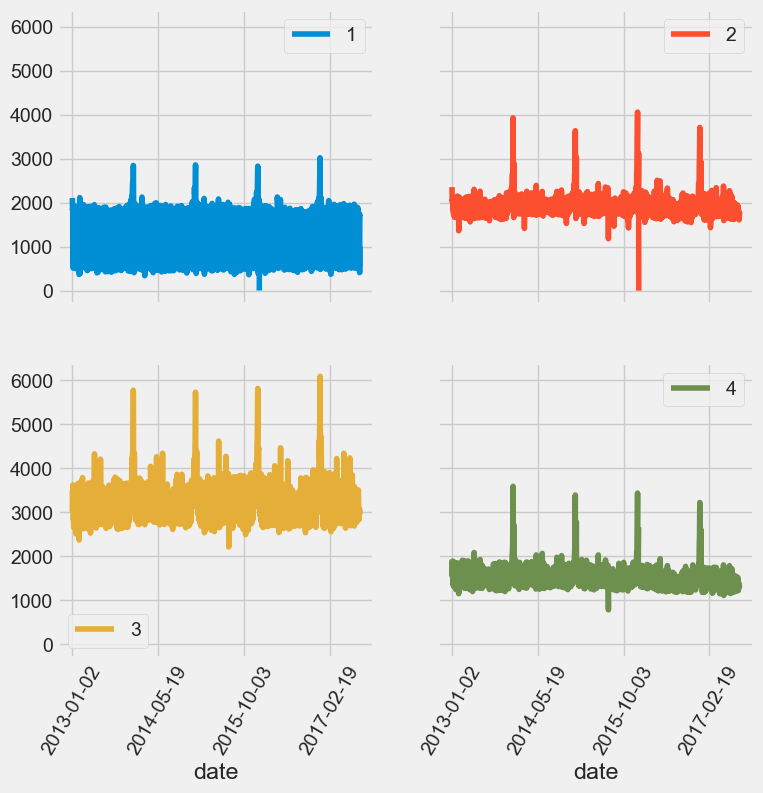

In [40]:
stores_1234.plot(
     subplots=True,
     layout=(2, 2),
     figsize=(8, 8),
     rot=60,
     sharey=True
)

# BAR CHARTS

**Bar charts** are used for making comparisons with categorical data

In [41]:
transactions.groupby(["store_nbr"]).agg({"transactions": "sum"})

,transactions
store_nbr,
1,2553963
2,3219901
3,5366350
4,2519007
5,2347877
6,3065896
7,2995993
8,4637971
9,3516162


In [42]:
transactions.groupby(["store_nbr"]).agg({"transactions": "sum"}).iloc[:10]

,transactions
store_nbr,
1,2553963
2,3219901
3,5366350
4,2519007
5,2347877
6,3065896
7,2995993
8,4637971
9,3516162


<Axes: xlabel='store_nbr'>

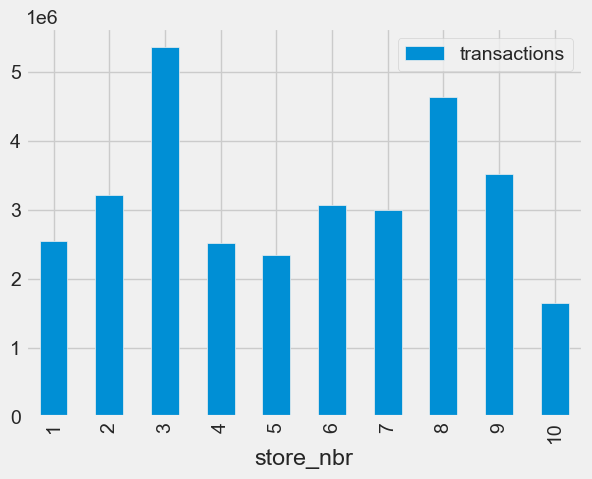

In [43]:
transactions.groupby(["store_nbr"]).agg({"transactions": "sum"}).iloc[:10].plot.bar()

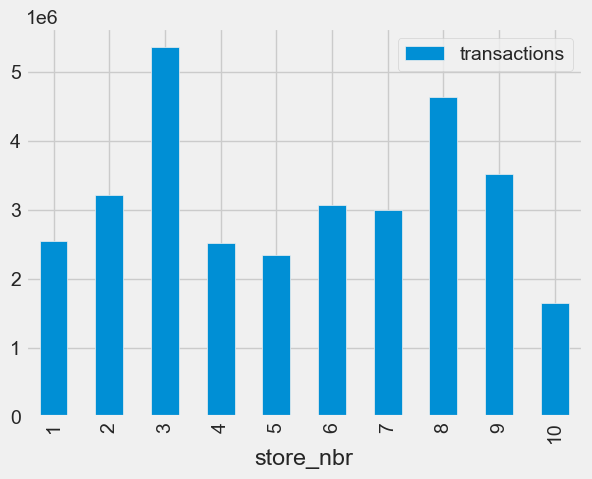

In [46]:
transactions_sum = transactions.groupby("store_nbr").agg({"transactions": "sum"}).iloc[:10]

# Plot without scientific notation
ax = transactions_sum.plot.bar()

# Format the y-axis labels to avoid scientific notation
#ax.get_yaxis().get_major_formatter().set_scientific(False)
# ax.get_yaxis().get_major_formatter().set_useOffset(False)

<Axes: ylabel='store_nbr'>

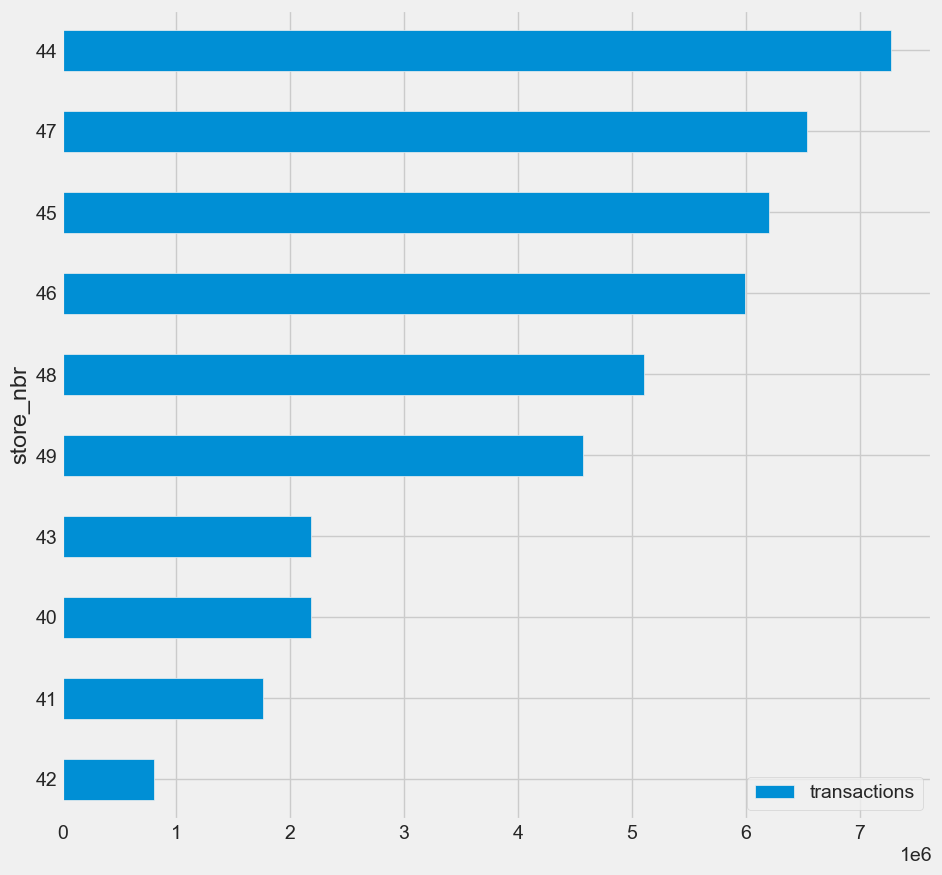

In [47]:
store_40s = list(range(40, 50))

(transactions
    .query("store_nbr in @store_40s")
    .groupby(["store_nbr"])
    .agg({"transactions": "sum"})
    .sort_values("transactions")
    .plot.barh(figsize=(10, 10)))

# GROUPED & STACKED BAR CHARTS

In [48]:
store_40s = list(range(40, 50))

In [50]:
transactions = pd.read_csv(transactions_data, parse_dates=["date"])

In [51]:
(
    transactions
        .query("store_nbr in @store_40s and date.dt.month in [1, 2, 3]")
        .pivot_table(index=transactions["date"].dt.month,
                     columns=transactions["store_nbr"],
                     values="transactions",
                     aggfunc="sum")
)

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,185490,148431,64758,188657,628438,538370,522763,568824,439045,386589
2,179215,143437,62400,186951,584046,511411,493100,539453,422158,362406
3,199810,156254,67713,203827,655630,561184,540294,594248,460341,407071


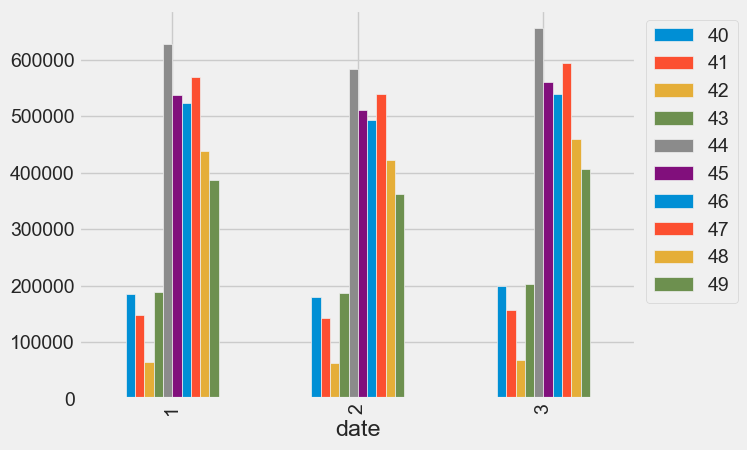

In [52]:
(
    transactions
        .query("store_nbr in @store_40s and date.dt.month in [1, 2, 3]")
        .pivot_table(index=transactions["date"].dt.month,
                     columns=transactions["store_nbr"],
                     values="transactions",
                     aggfunc="sum")
).plot.bar().legend(bbox_to_anchor=(1, 1))

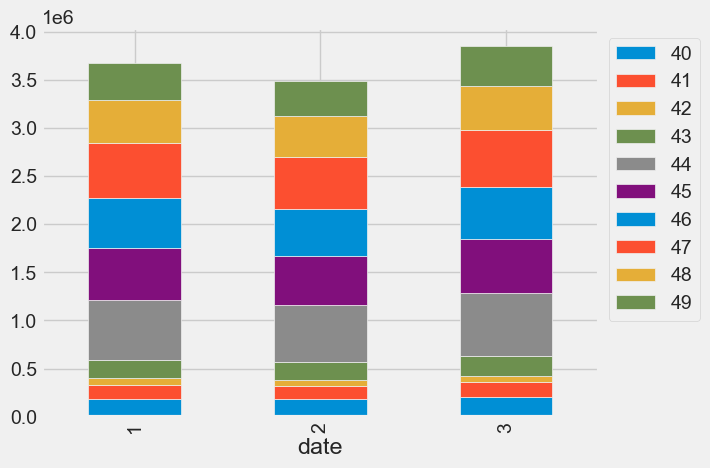

In [53]:
(
    transactions
        .query("store_nbr in @store_40s and date.dt.month in [1, 2, 3]")
        .pivot_table(index=transactions["date"].dt.month,
                     columns=transactions["store_nbr"],
                     values="transactions",
                     aggfunc="sum")
).plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1))

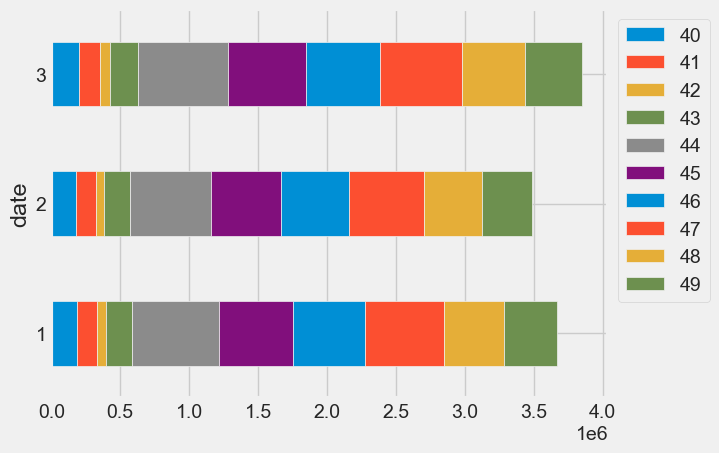

In [54]:
(
    transactions
        .query("store_nbr in @store_40s and date.dt.month in [1, 2, 3]")
        .pivot_table(index=transactions["date"].dt.month,
                     columns=transactions["store_nbr"],
                     values="transactions",
                     aggfunc="sum")
).plot.barh(stacked=True).legend(bbox_to_anchor=(1, 1))

In [55]:
(
    transactions
        .query("store_nbr in @store_40s and date.dt.month in [1, 2, 3]")
        .pivot_table(index=transactions["date"].dt.month,
                     columns=transactions["store_nbr"],
                     values="transactions",
                     aggfunc="sum").apply(lambda x: x*100 / sum(x), axis=1)
)

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,5.052344,4.042938,1.763867,5.138606,17.117285,14.664028,14.238927,15.493529,11.958631,10.529844
2,5.143092,4.116339,1.790748,5.365099,16.760887,14.676416,14.150929,15.481162,12.115043,10.400287
3,5.194765,4.062374,1.760438,5.299201,17.045413,14.589956,14.046847,15.449572,11.968187,10.583246


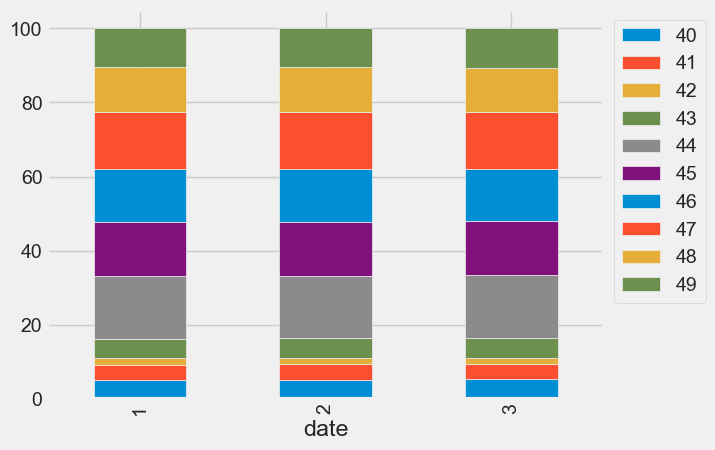

In [56]:
(
    transactions
        .query("store_nbr in @store_40s and date.dt.month in [1, 2, 3]")
        .pivot_table(index=transactions["date"].dt.month,
                     columns=transactions["store_nbr"],
                     values="transactions",
                     aggfunc="sum").apply(lambda x: x*100 / sum(x), axis=1)
).plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1))

# EXERCISE: BAR CHARTS

#### NEW MESSAGE: 
- From: Joey Justin Time (Logistics Clerk)
- Subject: Transactions by Store

`Hi there, thanks for your help!`

`Can we summarize total transactions by sales in a bar chart?`

`Then, create a horizontal bar chart with the y axis as month,
and the x axis as sales, sorted from January to February.`

`Some code has been provided in the notebook attached to
create the table for the stacked bar plot.`

`Thanks!`

In [57]:
# convert dates to datetime64

stores_1234.index = stores_1234.index.astype("datetime64[ns]") 

stores_1234

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


In [58]:
stores_1234.sum()

store_nbr
1    2553963.0
2    3219901.0
3    5366350.0
4    2519007.0
dtype: float64

<Axes: xlabel='store_nbr'>

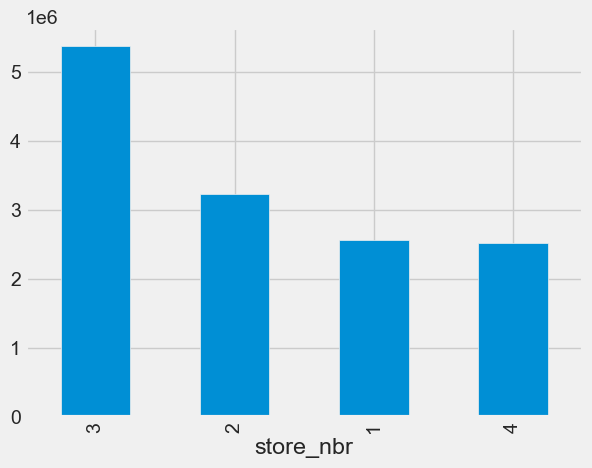

In [59]:
stores_1234.sum().sort_values(ascending=False).plot.bar()

In [60]:
stores_1234_monthly = stores_1234.groupby(stores_1234.index.month).sum()
stores_1234_monthly

store_nbr,1,2,3,4
date,,,,
1,229203.0,284134.0,463260.0,222075.0
2,209400.0,265922.0,437238.0,209211.0
3,232178.0,293076.0,487224.0,231837.0
4,229081.0,287325.0,478308.0,223928.0
5,231160.0,293588.0,491961.0,228753.0
6,231514.0,284835.0,474668.0,222678.0
7,236032.0,288783.0,484698.0,224327.0
8,202821.0,255475.0,431752.0,200100.0
9,182035.0,228658.0,379101.0,178172.0


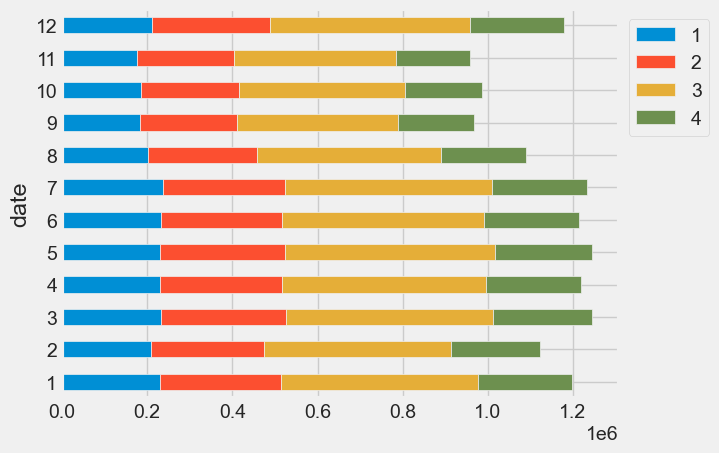

In [63]:
stores_1234_monthly.plot.barh(stacked=True).legend(bbox_to_anchor=(1, 1))

# PIE CHARTS

**Pie Charts** are used for showing composition with categorical data

In [66]:
transactions.head()


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


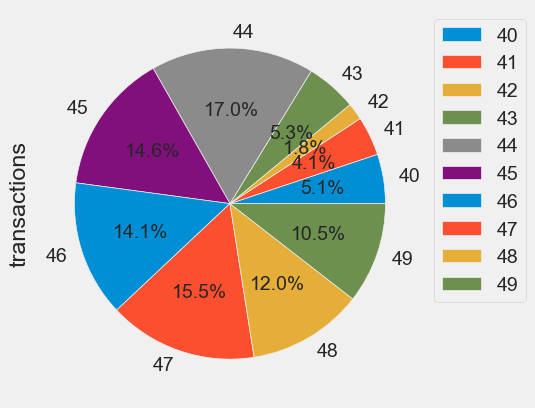

In [67]:
(
    transactions
        .query("store_nbr in @store_40s and date.dt.month in [1, 2, 3]")
        .groupby("store_nbr")
        .agg({"transactions": "sum"})
        .plot.pie(y="transactions", autopct='%1.1f%%')
).legend(bbox_to_anchor=(1, 1))


**PRO TIP**: Pie charts get a bad rep, but they can be effective as long as:
- No. of categories <= 5


# SCATTERPLOTS

**Scatterplots** are used for showing the relationshipi between numerical series

<Axes: xlabel='44', ylabel='47'>

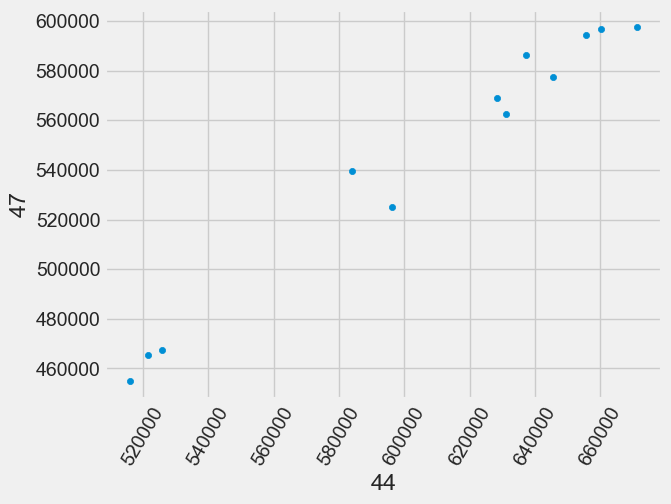

In [69]:
(
    transactions
        .query("store_nbr in @store_40s")
        .pivot_table(index=transactions["date"].dt.month,
               columns="store_nbr",
               values="transactions",
               aggfunc="sum")
).plot.scatter(x=44, y=47, rot=60)

# EXERCISE: SCATTERPLOTS

#### NEW MESSAGE: 
- From: Joey Justin Time (Logistics Clerk)
- Subject: Relationship Between Store Sales

`Hi there,`

`I was curious to see whether stores tend to have high sales at
the same time.`

`Can you make a scatterplot of the relationship between store
2 and 3 sales?`

`Then, color the dots by month to check if the relationship is
different across time.`

`Thanks!`

>  **HINT**:
> - Color the dots by month.
> - Use `c=stores_1234.index.month` to do so.

In [70]:
stores_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


<Axes: xlabel='3', ylabel='2'>

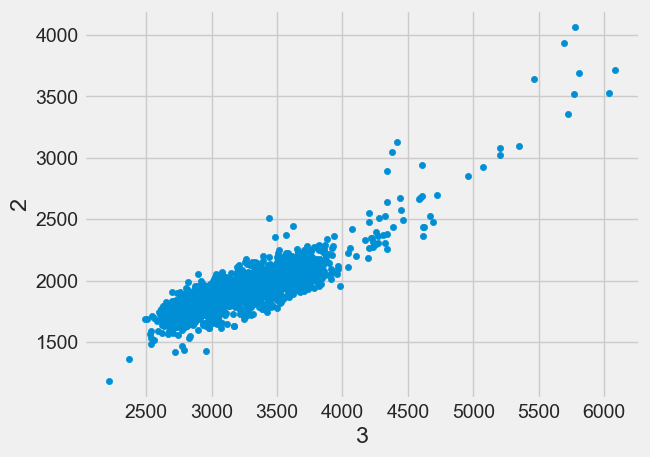

In [71]:
stores_1234.plot.scatter(x=3, y=2)

<Axes: xlabel='3', ylabel='2'>

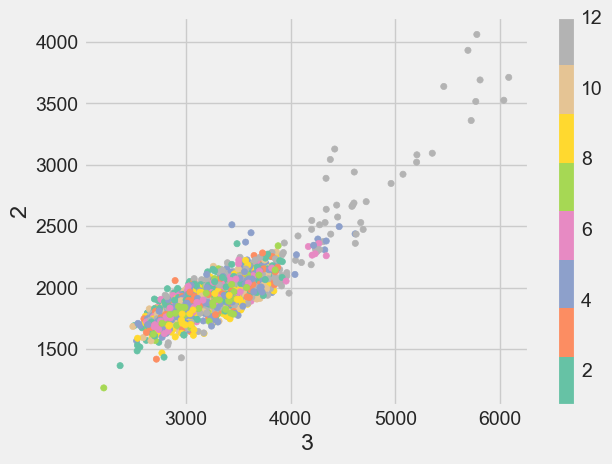

In [73]:
stores_1234.plot.scatter(x=3, y=2, c=stores_1234.index.month, colormap="Set2")

# HISTOGRAMS

**Histograms** are used for showing the distribution of numerical series
- It divides the data in "bins" and plots the frequency of values that fall into each bin as bars

In [74]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


<Axes: ylabel='Frequency'>

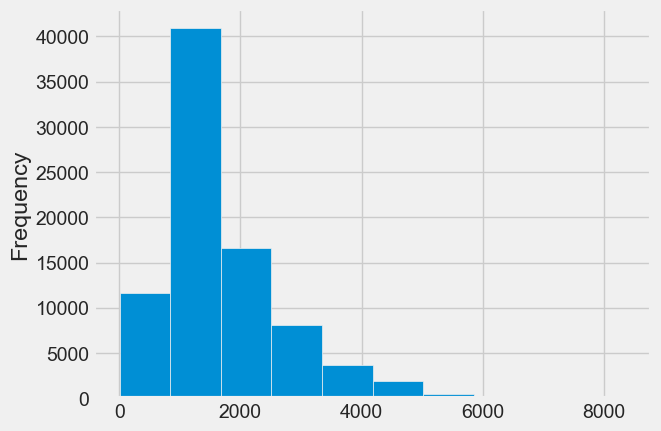

In [75]:
transactions.loc[:, "transactions"].plot.hist()

<Axes: ylabel='Frequency'>

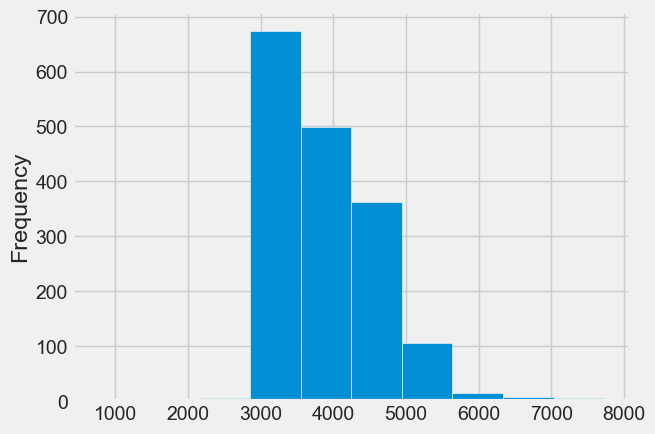

In [76]:
transactions.loc[transactions['store_nbr']==47, "transactions"].plot.hist()

In [77]:
transactions.loc[transactions['store_nbr']==47, "transactions"]

41       4161
87       3660
133      3915
179      4764
225      4935
         ... 
83264    4009
83318    3825
83372    3741
83426    3606
83480    3581
Name: transactions, Length: 1677, dtype: int64

In [89]:
sales_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [97]:
sales_df.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [112]:


# Filter for the desired families
desired_families = ['DAIRY', 'PRODUCE',]
filtered_df = sales_df[sales_df['family'].str.upper().isin(desired_families)]

# Pivot the table
pivot_df = filtered_df.pivot_table(index='date', columns='family', values='sales', aggfunc='sum').reset_index()



# Display the pivot table
pivot_df.head()


family,date,DAIRY,PRODUCE
0,2016-01-01,1033.0,2384.5090
1,2016-01-02,55039.0,146126.1640
2,2016-01-03,68371.0,183392.0229
3,2016-01-04,52242.0,155059.5071
4,2016-01-05,45174.0,141014.1231


<Axes: ylabel='Frequency'>

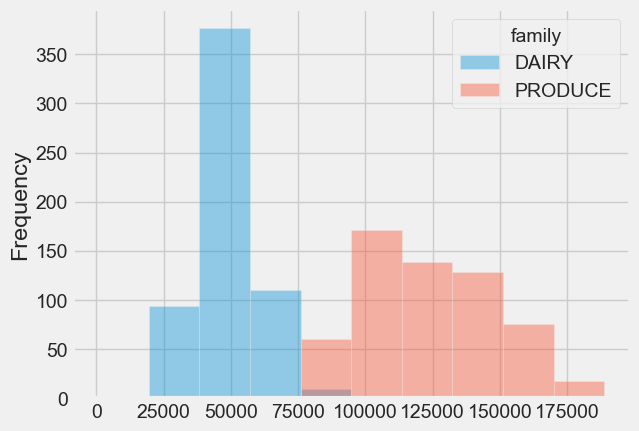

In [113]:
pivot_df[["DAIRY", "PRODUCE"]].plot.hist(alpha=0.4)

# EXERCISE: HISTOGRAMS

#### NEW MESSAGE: 
- From: Joey Justin Time (Logistics Clerk)
- Subject: Transaction Distributions

`Hi there,`

`Can you plot the distributions of sales for stores 2 and 3?`
`
I want to see how often store 2 has sales similar to store 3, as
well as if there are any outlier type days.`

`Thanks!`

In [114]:
stores_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


<Axes: ylabel='Frequency'>

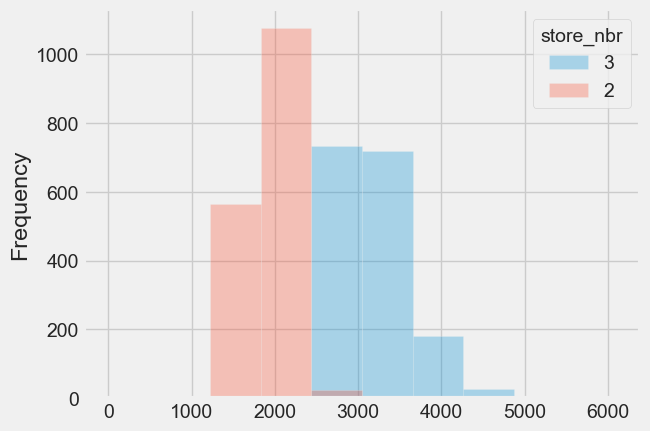

In [115]:
stores_1234.loc[:, [3, 2]].plot.hist(alpha=0.3)